··························································································································································································································································································································
En este notebook vamos a convertir el modelo de regresión en uno de clasificación. Como anteriormente hemos visto este problema tiene un sesgo negativo hacia la derecha, por lo que la mayor parte de la energía se concentra en números más bajos que altos. Para esta práctica vamos a hacer la división de la siguinte forma:<br>
Cuando la energía sea menor que el tercer cuantil, se considerará clase “baja”(0), y 
cuando sea mayor, clase  “alta”(1). <br>
Vamos a utilizar la semilla 79(Nia Nathalia).
··························································································································································································································································································································

··························································································································································································································································································································
Antes de realizar la clasificación vamos a ver si para el modelo anterior, en las predicciones, se realizaba mayor error al predecir energías más bajas o energías más altas. Por ello, vamos a crear un csv que almacene las diferencias de cada fila y finalmente haga la media en función de la clase a la que pertenece. 
··························································································································································································································································································································

In [23]:
import pandas as pd

# Leer los archivos CSV
predicciones_df = pd.read_csv('predicciones.csv')
wind_comp_df = pd.read_csv('wind_comp.csv.gz')

# Calcular el tercer cuartil de la columna 'energy' en wind_comp_df
third_quantile = wind_comp_df['energy'].quantile(0.75)

# Clasificar las observaciones en dos clases: "baja" y "alta"
wind_comp_df['clase'] = 'baja'
wind_comp_df.loc[wind_comp_df['energy'] > third_quantile, 'clase'] = 'alta'

# Extraer las columnas 'energy' de cada DataFrame
predicciones_energy = predicciones_df['energy']
wind_comp_energy = wind_comp_df['energy']

# Calcular la diferencia por filas
diferencia_energia = abs(predicciones_energy - wind_comp_energy)

# Crear un nuevo DataFrame para la comparación
comparacion_df = pd.DataFrame({
    'energy_predicciones': predicciones_energy,
    'energy_wind_comp': wind_comp_energy,
    'diferencia_energia': diferencia_energia,
    'clase': wind_comp_df['clase']  # Agregar la columna de clase
})

# Calcular la media de la diferencia de energía para cada clase
media_dif_baja = comparacion_df[comparacion_df['clase'] == 'baja']['diferencia_energia'].mean()
media_dif_alta = comparacion_df[comparacion_df['clase'] == 'alta']['diferencia_energia'].mean()

# Imprimir las medias de diferencia de energía para cada clase
print("Media de diferencia de energía para la clase baja:", media_dif_baja)
print("Media de diferencia de energía para la clase alta:", media_dif_alta)

# Guardar el DataFrame en un archivo CSV
comparacion_df.to_csv('comparacion.csv', index=False)


Media de diferencia de energía para la clase baja: 225.89387454343978
Media de diferencia de energía para la clase alta: 491.8992503103379


··························································································································································································································································································································
Como se puede comprobar, hay un mayor error en el cálculo de las energías clasificadas como altas. Esto es algo esperado dado que el problema original tiene un sesgo positivo hacia la derecha, lo que significa que la mayoría de las energías tienden a ser bajas. Por lo tanto, el modelo puede tener dificultades para clasificar correctamente las clase minoritaria(alta).
··························································································································································································································································································································

----------------------------------------------------------------------------------------------------------------
## IMPORTS
----------------------------------------------------------------------------------------------------------------

In [24]:
import pandas as pd
import time
from matplotlib import style
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn import metrics
from sklearn import tree
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from scipy.stats import uniform
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, KFold, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from scipy.stats import randint as sp_randint
import multiprocessing
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import warnings
warnings.filterwarnings('ignore')

----------------------------------------------------------------------------------------------------------------
## CARGAR LOS DATOS Y CLASIFICAR ENERGÍA 
----------------------------------------------------------------------------------------------------------------

··························································································································································································································································································································
Añadimos un atributo llamado class que agrupa cada fila en alta o baja en función de si la energía es menor que el tercer cuantil (baja) o no (alta).
··························································································································································································································································································································

In [25]:


# Cargar los datos en un DataFrame
wind_ava = pd.read_csv('wind_ava.csv.gz', compression="gzip")

# Eliminar todos los datos que no corresponden a la localización 13
wind_ava_13 = [col for col in wind_ava.columns if col == 'datetime' or col == 'energy' or col.endswith('.13')]
df_filtered = wind_ava[wind_ava_13].copy()  # Use copy() to avoid chained indexing

# Calcular el tercer cuantil de la energía
third_quantile = df_filtered['energy'].quantile(0.75)

# Crear una nueva columna en el DataFrame para representar la clase
df_filtered.loc[:, 'class'] = df_filtered['energy'].apply(lambda x: 0 if x < third_quantile else 1)

# Dividir el DataFrame en características (X) y la variable objetivo (y) para el modelo de clasificación
X = df_filtered.drop(['datetime', 'energy', 'class'], axis=1)  # Características
Y = df_filtered['class']


··························································································································································································································································································································
Eliminamos la energía y la fecha de nuestra base de datos. Ahora nuestra variable de respuesta será class.
··························································································································································································································································································································

In [26]:
print('The shape of the data table is:')
print('===============================')
print(df_filtered.shape)
# print(df_filtered.dtype)
df_filtered = df_filtered.drop('datetime', axis=1)
df_filtered = df_filtered.drop('energy', axis=1)
df_filtered.head()

The shape of the data table is:
(4748, 25)


,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,stl1.13,...,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13,class
0,2.510824e+06,9.186295,13.527577,1.386937e+06,2.344111,2.432983,-0.757587,-1.922799,99846.319914,280.960661,...,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617,0
1,2.513173e+06,8.849569,6.896412,1.153526e+06,2.343719,2.432838,-1.412620,-1.403011,99917.733093,279.296651,...,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469,0
2,2.509627e+06,7.924080,4.774439,1.098754e+06,2.343300,2.432704,-2.290185,-0.754580,99764.378681,278.233956,...,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748,1
3,2.510571e+06,6.922709,0.000000,1.076021e+06,2.342830,2.432514,-3.497855,1.271028,99672.670459,280.787263,...,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478,1
4,2.505664e+06,6.646282,0.000000,1.070830e+06,2.342437,2.432369,-0.971249,0.553060,99372.811211,279.583112,...,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114,0


··························································································································································································································································································································
Comprobamos si las clases están balanceadas o no. En caso de que no lo estén, en los modelos que implementemos posteriormente se balancearán las clases para garantizar que el modelo no tenga sesgos hacia una clase mayoritaria y pueda aprender de manera igual . Así evitamos la generación de falsos positivos, ya que un modelo desbalanceado tiende a favorecer la clase mayoritaria y puede clasificar incorrectamente las muestras de la clase minoritaria. Aunque un modelo desbalanceado pueda mostrar un mayor accuracy en comparación con uno balanceado, esto no es correcto ya que clasificará todas las clases en la clase mayoritaria y realmente no estará teniendo en cuenta a la minoritaria, por lo que producirá un error en función de la cantidad de instancias que hay de la clase minoritaria porque siempre fallará en clasificarla.
··························································································································································································································································································································

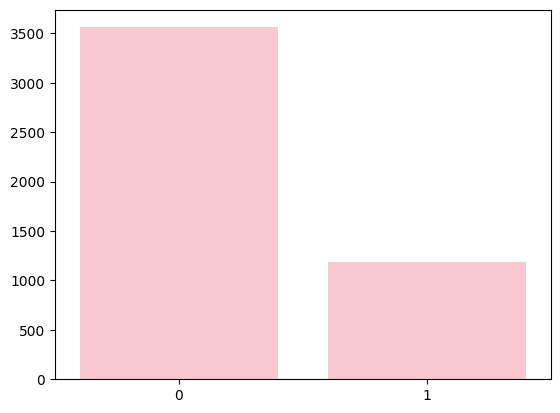

In [27]:

conteo_baja = np.count_nonzero(Y == 0)
conteo_alta = np.count_nonzero(Y == 1)

lista = [conteo_baja, conteo_alta]

sns.barplot(x=[0, 1], y=lista, color='pink')
plt.show()


··························································································································································································································································································································
Como se puede observar están muy desbalanceadas debido a que hay + de 3500 muestras para energías con valores bajos y - de 1500 energías con valores altos.
··························································································································································································································································································································

··························································································································································································································································································································
Para la evaluación del modelo vamos autilizar dos gráficas principales:<br>
LA MATRIZ DE CONFUSIÓN que sirve para visualizar el rendimiento del modelo en términos de la clasificación correcta e incorrecta de las clases. Esta matriz nos permite identificar fácilmente los falsos positivos, falsos negativos, verdaderos positivos y verdaderos negativos, lo cual ayuda a comprender dónde está cometiendo errores el modelo.<br>
LA CURVA ROC que sirve para representar la tasa de verdaderos positivos (TPR) frente a la tasa de falsos positivos (FPR). Esto nos permite visualizar cómo varía el equilibrio entre la sensibilidad y la especificidad del modelo. Un AUC alto significa que el modelo identifica bien ambas clases.<br>
También utilizaremos ACCURACY para ver la proporción de predicciones correctas.
··························································································································································································································································································································

----------------------------------------------------------------------------------------------------------------
## HOLDOUT. Entrenamiento y evaluación de un árbol de decisión con un conjunto de pruebas
----------------------------------------------------------------------------------------------------------------

··························································································································································································································································································································
El pimer modelo que vamos a entrenar es un arbol de decisión con Holdout.
··························································································································································································································································································································

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=79)
print(X_train.shape, y_train.shape) #3181 ENTRENAMIENTO Y 1567 TEST
print(X_test.shape, y_test.shape)   

(3181, 22) (3181,)
(1567, 22) (1567,)


··························································································································································································································································································································
Entrenamos el modelo, sin balancear las clases y imprimiendo un esquema del arbol.
··························································································································································································································································································································

In [29]:
# Definimos el modelo
clf = tree.DecisionTreeClassifier()
np.random.seed(79)
# Entrenamos el modelo
clf.fit(X_train, y_train)
# We can see that the tree is inside
print(tree.export_text(clf))

|--- feature_15 <= 0.42
|   |--- feature_20 <= -5.71
|   |   |--- feature_3 <= 551921.62
|   |   |   |--- feature_12 <= 285.96
|   |   |   |   |--- feature_1 <= 15.11
|   |   |   |   |   |--- feature_4 <= 2.50
|   |   |   |   |   |   |--- feature_14 <= 279.21
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_14 >  279.21
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  2.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  15.11
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_12 >  285.96
|   |   |   |   |--- feature_8 <= 97883.47
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_8 >  97883.47
|   |   |   |   |   |--- feature_2 <= 0.02
|   |   |   |   |   |   |--- feature_6 <= -5.94
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_6 >  -5.94
|   |   |   |   |   |   |   |--- feature_8 <= 98379.62
|   |   |   |   |   |   |   |   |--- feature_20 <= -6.50


··························································································································································································································································································································
Comparamos si el valor que predice corresponde con el que realmente es de los primeros 15 valores.
··························································································································································································································································································································

In [30]:
y_test_pred = clf.predict(X_test)
print(type(y_test_pred))
print(type(y_test))

# Convertir la serie de pandas a una matriz de NumPy
y_test_np = y_test.values

# Comparar predicción con valor real
print(np.hstack((y_test_pred[:15, np.newaxis], y_test_np[:15, np.newaxis])))


<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
[[0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]]


··························································································································································································································································································································
Evaluamos el modelo con distintas métricas, viendo el acurracy del modelo en sí y utilizando métricas de precisión, recall, f1-score y support  (cantidad) de cada clase. Por último imprimimos la matriz de confusión para ver la cantidad de falsos negativos y falsos positivos que se producen como verdaderos positivos y verdaderos negativos. Positivo-->baja/Negativo-->alta.
··························································································································································································································································································································

Accuracy: 0.8142948308870454
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1175
           1       0.62      0.65      0.64       392

    accuracy                           0.81      1567
   macro avg       0.75      0.76      0.76      1567
weighted avg       0.82      0.81      0.82      1567

Precision of classes: [0.88169257 0.62347188]
Recall of classes: [0.86893617 0.6505102 ]
Fscore of classes: [0.8752679  0.63670412]
Support of classes: [1175  392]


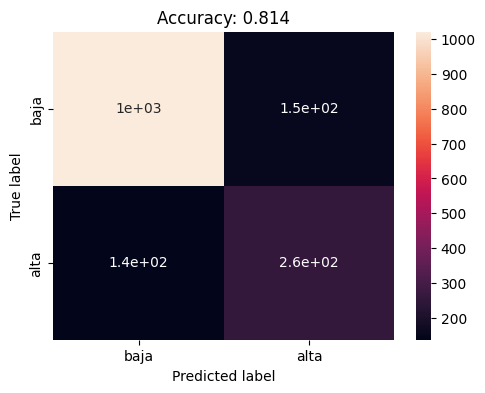

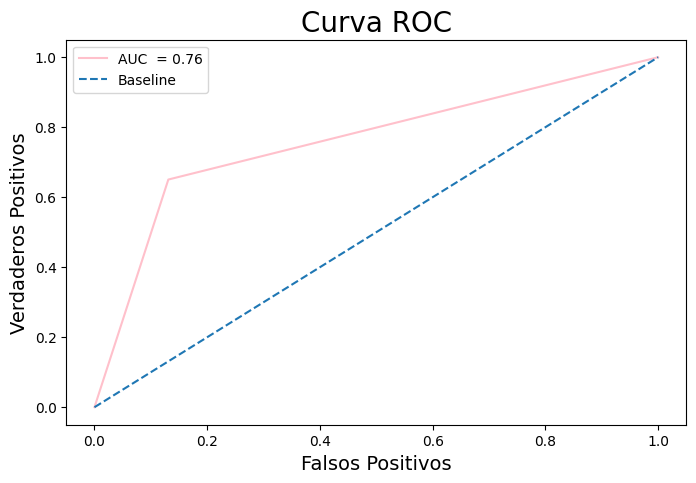

In [31]:

# Calcular la precisión del árbol de decisión
accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy_tree)

#Datos modelo.
result1 = metrics.classification_report(y_test, y_test_pred)
print("Classification Report:")
print(result1)

# Calcular precisión, recall, fscore y support
precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, y_test_pred)
print("Precision of classes:", precision)
print("Recall of classes:", recall)
print("Fscore of classes:", fscore)
print("Support of classes:", support)

# Crear una matriz de confusión
cm = metrics.confusion_matrix(y_test, y_test_pred)


cm_df = pd.DataFrame(cm,
                     index=['baja', 'alta'],  # 'baja' para 0 y 'alta' para 1
                     columns=['baja', 'alta'])

# Gráfico  la matriz de confusión
plt.figure(figsize=(5.5, 4))
sns.heatmap(cm_df, annot=True)
plt.title('Accuracy: {0:.3f}'.format(accuracy_tree))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
probs = clf.predict_proba(X_test)[:, 1]
auc = metrics.roc_auc_score(y_test, probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)

# Tracemos la curva ROC
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC  = {auc:.2f}', color='pink')
plt.plot([0, 1], [0, 1], linestyle='--', label='Baseline')
plt.title('Curva ROC', size=20)
plt.xlabel('Falsos Positivos', size=14)
plt.ylabel('Verdaderos Positivos', size=14)
plt.legend()

plt.show()

··························································································································································································································································································································
Este es un arbol que no está balanceado y como podemos ver da muy buen accuracy pero a la hora de diferenciar bien las clases la curva ROC no es mayor de 0.8 esto significa que, aunque el modelo tiene una alta precisión global (accuracy), su capacidad para distinguir entre las clases positivas y negativas no es tan fuerte. Una curva ROC por debajo de 0.8 sugiere que el modelo no está logrando una separación tan clara entre las clases, lo que podría llevar a una mayor proporción de falsos positivos o falsos negativos. 
··························································································································································································································································································································

----------------------------------------------------------------------------------------------------------------
## HPO ARBOL DE DECISIÓN Y BALANCEO
----------------------------------------------------------------------------------------------------------------

··························································································································································································································································································································
Vamos a hacer el modelo del árbol de decisión balanceado para poder comparar ambos arboles. Vamos a ajustar los hiperparámetros siguientes:<br>
-Criterio.(gini o entropia).<br>
-Máxima profundidad.<br>
-Cantidad mínima de muestras a dividir.<br>
-Cantidad mínima de hojas.
··························································································································································································································································································································

Fitting 5 folds for each of 560 candidates, totalling 2800 fits
Mejores parámetros del modelo de árbol de decisión:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 25}
Balanced Accuracy: 0.8273286490577143
Classification Report:
              precision    recall  f1-score   support

        baja       0.94      0.83      0.88      1069
        alta       0.61      0.83      0.70       356

    accuracy                           0.83      1425
   macro avg       0.77      0.83      0.79      1425
weighted avg       0.85      0.83      0.83      1425



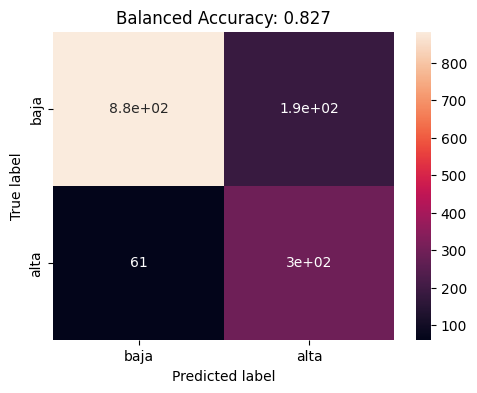

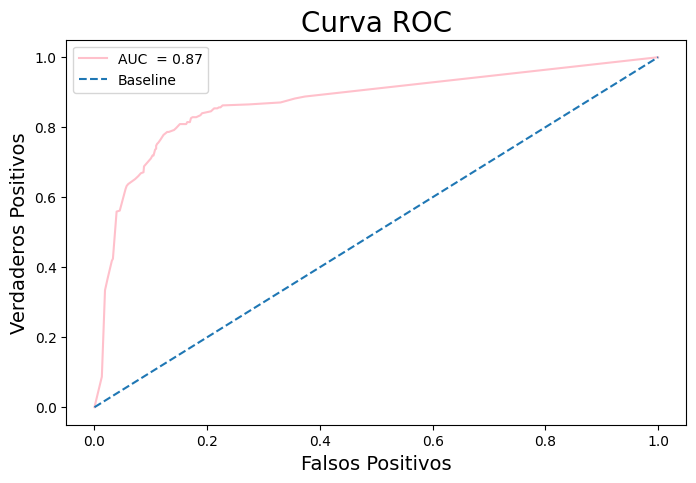

In [32]:

# Split estratificado de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=79, stratify=Y)

# Definir el modelo de árbol de decisión
clf = DecisionTreeClassifier(class_weight='balanced')

# Definir el espacio de búsqueda de parámetros
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50,60,70],
    'min_samples_split': [2, 5, 10, 15, 20,25,30],
    'min_samples_leaf': [1, 2, 4,5,6]
}

# Realizar búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='balanced_accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y sus parámetros
best_clf = grid_search.best_estimator_
best_params_clf = grid_search.best_params_

print("Mejores parámetros del modelo de árbol de decisión:")
print(best_params_clf)

# Entrenar el modelo con los mejores parámetros
best_clf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_test_pred = best_clf.predict(X_test)

# Calcular la precisión balanceada
accuracy_tree = balanced_accuracy_score(y_test, y_test_pred)
print("Balanced Accuracy:", accuracy_tree)

# Reporte de clasificación
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['baja', 'alta']))

# Crear una matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)


cm_df = pd.DataFrame(cm, index=['baja', 'alta'], columns=['baja', 'alta'])

# Gráfico de la matriz de confusión
plt.figure(figsize=(5.5, 4))
sns.heatmap(cm_df, annot=True)
plt.title('Balanced Accuracy: {0:.3f}'.format(accuracy_tree))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

probs = best_clf.predict_proba(X_test)[:, 1]
auc = metrics.roc_auc_score(y_test, probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)

# Trazar la curva ROC
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC  = {auc:.2f}', color='pink')
plt.plot([0, 1], [0, 1], linestyle='--', label='Baseline')
plt.title('Curva ROC', size=20)
plt.xlabel('Falsos Positivos', size=14)
plt.ylabel('Verdaderos Positivos', size=14)
plt.legend()

plt.show()


··························································································································································································································································································································
Con búsqueda de hipérparametros en el arbol de decisión da un valor menor de acurracy pero al estar las clases  balanceadas la curva ROC es de +-0.87. Este moddelo es mejor ya que aun teniendo un menor acurracy sigue siendo bastante alto y el modelo diferencia mejor las clases con un AUC=+-0.87.
··························································································································································································································································································································

----------------------------------------------------------------------------------------------------------------
## KNN
----------------------------------------------------------------------------------------------------------------

··························································································································································································································································································································
Búsqueda de hipérparametros con el número de vecions (k) y qué método de distancia se utiliza. Dará prioridad a aquellos vecinos que están más cerca (en función de la distancia). Para garantizar que las clases estén balanceadas, utilizaremos sobremuestreo para aumentar las muestras de las clases minoritarias.
··························································································································································································································································································································

Precisión del modelo KNN después de la búsqueda de hiperparámetros y sobremuestreo: 0.799617102744097
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1175
           1       0.58      0.73      0.65       392

    accuracy                           0.80      1567
   macro avg       0.74      0.78      0.75      1567
weighted avg       0.82      0.80      0.81      1567

Matriz de confusión:
[[967 208]
 [106 286]]
Mejores parámetros encontrados: {'n_neighbors': 3}


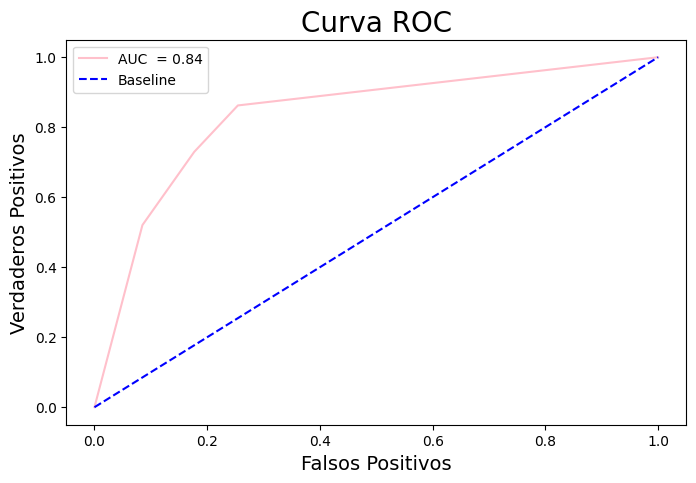

In [33]:

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=79, stratify=Y)


oversampler = RandomOverSampler(random_state=79)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Escalar datos.
scaler = StandardScaler()

# Escalar las características del conjunto de entrenamiento y prueba
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Definir el clasificador KNN
knn = KNeighborsClassifier()

# Definir los parámetros para la búsqueda de hiperparámetros
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 15, 20, 25, 30]}

# Inicializar GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='balanced_accuracy')

# Entrenar el GridSearchCV 
grid_search.fit(X_train_scaled, y_train_resampled)

# Obtener el mejor modelo
best_knn = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba escalado con el mejor modelo
y_pred = best_knn.predict(X_test_scaled)

# Calcular la precisión del modelo
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Precisión del modelo KNN después de la búsqueda de hiperparámetros y sobremuestreo:", accuracy)

# Imprimir el informe de clasificación
print(metrics.classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros encontrados:", grid_search.best_params_)

probs = best_knn.predict_proba(X_test_scaled)[:, 1]
# Calcular el área bajo la curva ROC (AUC)
auc = metrics.roc_auc_score(y_test, probs)
# Calcular la matriz de confusión.
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)

# Trazar la curva ROC
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC  = {auc:.2f}', color='pink')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('Curva ROC', size=20)
plt.xlabel('Falsos Positivos', size=14)
plt.ylabel('Verdaderos Positivos', size=14)
plt.legend()

plt.show()


································································································································································································································································
Para este modelo con las clases balanceadas mediantes sobremuestreo hace una buena diferenciación entre las clases, se puede observar en el valor de la curva ROC (0.84).
································································································································································································································································

----------------------------------------------------------------------------------------------------------------
## SVM como CLASIFICADOR
----------------------------------------------------------------------------------------------------------------

··························································································································································································································································································································
## SVM RADIAL
··························································································································································································································································································································

··························································································································································································································································································································
Vamos a implementar el modelo SVM RADIAL, con distribuciones estadísticas, como en el modelo de regresión y comparar los valores que nos da en comparación con los demás modelos de clasificación y con el de regresión para ver si es mejor como clasificador o regresor.
··························································································································································································································································································································

El accuracy de test es: 85.82456140350877%


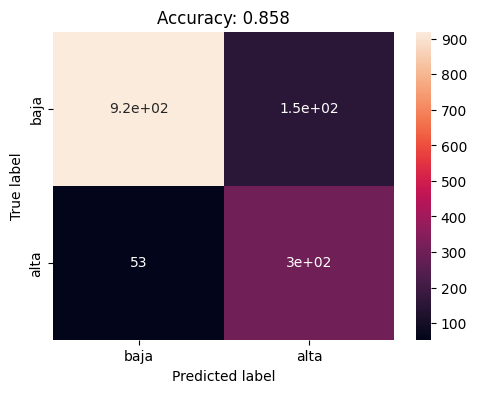

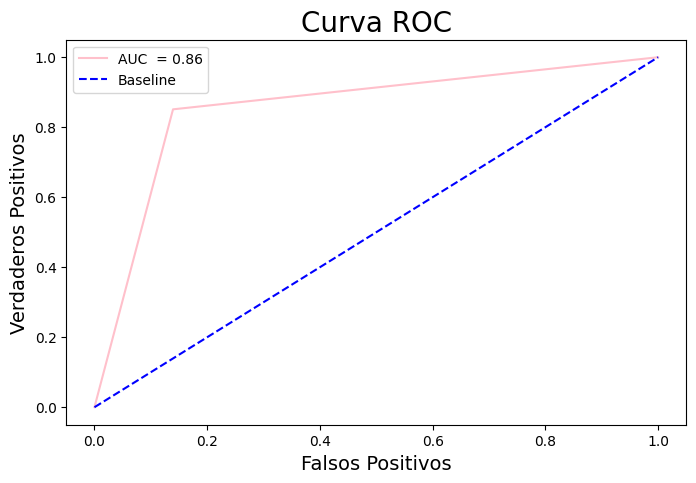

In [34]:

# 1. Split estratificado y escalado de datos
from scipy.stats import loguniform

#Escalar datos.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=79, stratify=Y)
#Configuración modelo.
budget = 50
inner = KFold(n_splits=3, shuffle=True, random_state=79)
svr_radial = SVR()
escalar = StandardScaler()
pipe_regr_radial_def = Pipeline([
    ('escalar', escalar),
    ('SVM', svr_radial)])
# Search space
param_grid = {'SVM__C': loguniform(1e-1, 1e4),
              'SVM__gamma': loguniform(1e-5, 1e1)}
#Búsqueda Randomized.

hpo_regr_radial = RandomizedSearchCV(pipe_regr_radial_def,
                            param_grid,
                            scoring='neg_mean_squared_error',
                            cv=inner,
                            n_jobs=4, verbose=0,
                            n_iter=budget
                        )

# Entrenar el modelo y ajustar parámetros
_ = hpo_regr_radial.fit(X=X_train, y=y_train)

best_params = hpo_regr_radial.best_params_
C_best = best_params['SVM__C']

# Entrenar el modelo con los mejores parámetros y evaluar en el conjunto de prueba
modelo = SVC(kernel='rbf', C=C_best, gamma='scale', class_weight='balanced').fit(X_train, y_train)
predicciones = modelo.predict(X_test)
accuracy = accuracy_score(y_true=y_test, y_pred=predicciones)
print(f"El accuracy de test es: {100*accuracy}%")

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predicciones)


cm_df = pd.DataFrame(conf_matrix,
                     index=['baja', 'alta'],
                     columns=['baja', 'alta'])

# Gráfico de  la matriz de confusión
plt.figure(figsize=(5.5, 4))
sns.heatmap(cm_df, annot=True)
plt.title('Accuracy: {0:.3f}'.format(accuracy))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#Curva Roc
auc = metrics.roc_auc_score(y_test, predicciones)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicciones)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC  = {auc:.2f}', color='pink')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('Curva ROC', size=20)
plt.xlabel('Falsos Positivos', size=14)
plt.ylabel('Verdaderos Positivos', size=14)
plt.legend();
plt.show()


··························································································································································································································································································································
Estamos ante un modelo muy bueno incluso mejor que el modelo final, ya que tiene el mejor accuracy y su curva  ROC de 0.86 indica que el modelo está teniendo un buen rendimiento en términos de diferenciación entre las clases. Si priorizamos como requisito la diferenciación de clases que el acurracy, este diriamos que es el mejor modelo. Viendo la matriz de confusión y habiendo balanceado los datos, da un error equilibrado de altas y de bajas, en función de la proporción de datos de cada clase comete casi el mismo error en clasificar una clase como postiva en negativa y negativa como positiva. MUY BUEN MODELO.
··························································································································································································································································································································

## REGRESIÓN LOGÍSTICA

··························································································································································································································································································································
Otro modelo que vamos a probar es el de regresión logística, que se encarga de determinar la probabilidad de que de que una instancia se corresponda a una clase determinada.
··························································································································································································································································································································

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, stratify=Y, random_state=79, shuffle=True)

··························································································································································································································································································································
Vamos a utilizar crossvalidation para ver por cada división los resultados de acurracy que da y calcular la media de los resultados.
··························································································································································································································································································································

In [36]:
#Configuración
# ==============================================================================
scaler = StandardScaler()
lr = LogisticRegression(class_weight='balanced', random_state=79)

pipe_scale_lr = Pipeline([
    ('scale', scaler),
    ('lr', lr)])

# Entrenamiento del modelo
# ==============================================================================
cv = KFold(n_splits=5, shuffle=True, random_state = 79 )
scores = cross_val_score(pipe_scale_lr, X_train, y_train, scoring='balanced_accuracy', cv = cv) #OJO!!! scoring=‘balanced_accuracy’
                                                                                      
print(f"All the accuracies are: {scores}")
print(f"And the average crossvalidation accuracy is: {scores.mean():.2f} +- {scores.std():.2f}")


All the accuracies are: [0.74746042 0.76149822 0.71174004 0.70587918 0.69936056]
And the average crossvalidation accuracy is: 0.73 +- 0.02


··························································································································································································································································································································
Realizamos la búsqueda de hiperparametros que son los siguientes:<br>
-lr__penalty: Tipo de regularización.<br>
-lr__C: Parámetro de regularización. <br>
-lr__solver: Algoritmo a utilizar en la optimización del problema. 
··························································································································································································································································································································

In [37]:
from scipy.stats import loguniform
#Configuración búsqueda hiperparámetros
param_distributions = {
    'lr__penalty': ['l2', 'elasticnet'],
    'lr__C': loguniform(1e-5, 1e5),  # Distribución loguniforme para C
    'lr__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Definir la validación cruzada interna
inner = KFold(n_splits=3, shuffle=True, random_state=79)

clf = RandomizedSearchCV(
    estimator=pipe_scale_lr,
    param_distributions=param_distributions,
    n_iter=50,  # Número de iteraciones
    scoring='balanced_accuracy',
    cv=inner,
    refit=True,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

# Entrenar RandomizedSearchCV
np.random.seed(79)
clf.fit(X=X_train, y=y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=79, shuffle=True),
                   estimator=Pipeline(steps=[('scale', StandardScaler()),
                                             ('lr',
                                              LogisticRegression(class_weight='balanced',
                                                                 random_state=79))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'lr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011CDA77AB70>,
                                        'lr__penalty': ['l2', 'elasticnet'],
                                        'lr__solver': ['newton-cg', 'lbfgs',
                                                       'liblinear', 'sag',
                                                       'saga']},
                   return_train_score=True, scoring='balanced_accuracy',
                   verbose=1)

In [38]:
resultados = pd.DataFrame(clf.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_lr__C,param_lr__penalty,param_lr__solver,mean_test_score,std_test_score,mean_train_score,std_train_score
44,9664.858587,l2,lbfgs,0.726898,0.028775,0.736904,0.008424
29,63.071947,l2,liblinear,0.724588,0.028186,0.736689,0.009553
25,213.339328,l2,newton-cg,0.724377,0.028310,0.736577,0.009686
35,1954.125411,l2,liblinear,0.724181,0.027048,0.737106,0.008921
49,3252.178215,l2,liblinear,0.724181,0.027048,0.737211,0.008911


··························································································································································································································································································································
Calculamos mejores parámetros del modelo e imprimimos los resultados.
··························································································································································································································································································································

In [39]:
clf.best_params_, clf.best_score_

({'lr__C': 9664.85858676755, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs'},
 0.7268984273936305)

In [40]:
# Información del modelo
# ==============================================================================
modelo_final = clf.best_estimator_
print("Intercept:", modelo_final['lr'].intercept_)
print("Coeficientes:", list(zip(df_filtered.columns, modelo_final['lr'].coef_.flatten(), )))
print("Accuracy de test:", modelo_final.score(X_test, y_test))

Intercept: [-0.3330542]
Coeficientes: [('p54.162.13', 0.5390499182814275), ('p55.162.13', 0.09030789968663416), ('cape.13', -0.17276181427590825), ('p59.162.13', 0.9606836671143846), ('lai_lv.13', 1.132794793796536), ('lai_hv.13', -1.1939303313056286), ('u10n.13', -5.275311043518784), ('v10n.13', 3.015801580599499), ('sp.13', -0.45607089152180297), ('stl1.13', 0.3471741979867481), ('u10.13', 6.652687196895242), ('v10.13', -4.115500845758206), ('t2m.13', -0.5946426082346769), ('stl2.13', -0.8111797297804088), ('stl3.13', 0.12975545431387628), ('iews.13', 0.9994036631858096), ('inss.13', -0.30579738573219467), ('stl4.13', 0.06383178599709217), ('fsr.13', 1.1576423324510576), ('flsr.13', -1.0990605035515029), ('u100.13', -2.5497327520362627), ('v100.13', 1.609014940464819)]
Accuracy de test: 0.7530312699425654


··························································································································································································································································································································
Vamos a realizar la matriz de confusión para ver como se clasifican las clases.
··························································································································································································································································································································

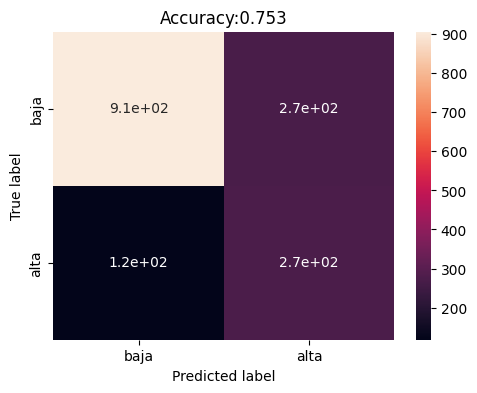

In [41]:
# Matriz de confusión
y_test_pred = modelo_final.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_test_pred)
accuracy = metrics.accuracy_score(y_test, y_test_pred)
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index=['baja', 'alta'],
                     columns = ['baja', 'alta'])
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Accuracy:{0:.3f}'.format(accuracy))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

··························································································································································································································································································································
Vamos a representar la curva ROC para analizar como este modelo distingue las clases.
··························································································································································································································································································································

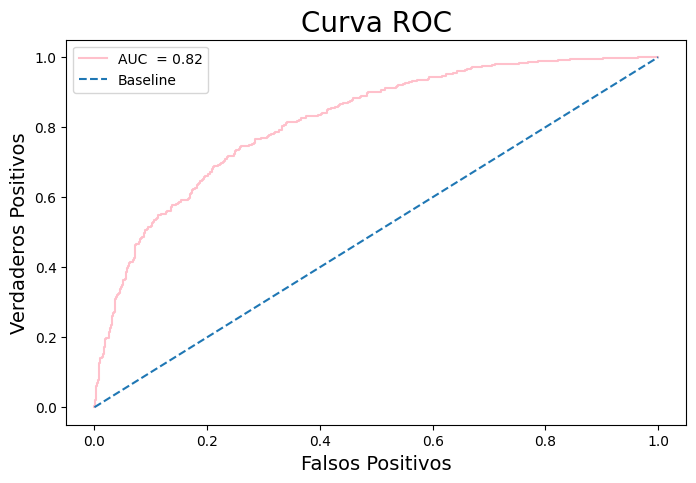

In [42]:
#Obtenemos las curva ROC y el área bajo la curva (AUC)

probs = modelo_final.predict_proba(X_test)[:, 1]

auc = metrics.roc_auc_score(y_test, probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC  = {auc:.2f}', color='pink')
plt.plot([0, 1], [0, 1], linestyle='--', label='Baseline')
plt.title('Curva ROC', size=20)
plt.xlabel('Falsos Positivos', size=14)
plt.ylabel('Verdaderos Positivos', size=14)
plt.legend();

··························································································································································································································································································································
Observando la matriz de confusión y la curva ROC, notamos que este no es uno de los mejores modelos, ya que su accuracy es el peor de todos los modelos evaluados anteriormente y su curva ROC es de las más bajas (0.82). Todo esto sugiere que este modelo produce una mayor cantidad de fallos a la hora de clasificar las clases en comparación con otros modelos, para este caso.
··························································································································································································································································································································

----------------------------------------------------------------------------------------------------------------
## RANDOM FOREST
----------------------------------------------------------------------------------------------------------------

··························································································································································································································································································································
Ahora el modelo que pasaremos a implementar es el de random forest que consiste en la combinación de varios árboles de desición con el objetivo de realizar predicciones generalizables. 
··························································································································································································································································································································

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Accuracy: 0.8844926611359285
Matriz de confusión:
[[1102   73]
 [ 108  284]]


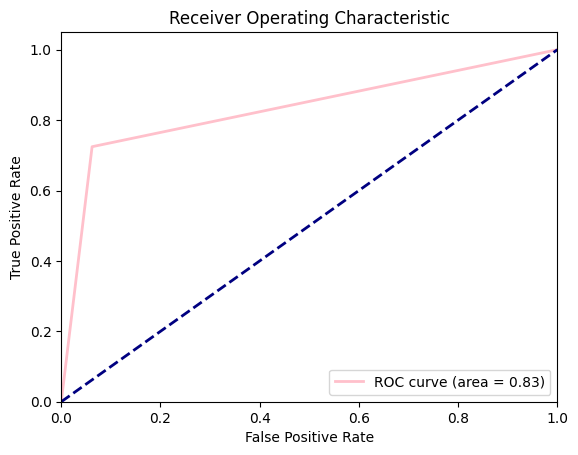

In [43]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
# Espacio de búsqueda de parámetros
param_grid = {
    'n_estimators': sp_randint(10, 200),
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'max_features': sp_randint(1, X.shape[1])
}

# Dividir los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=79, stratify=Y)


# Validación cruzada estratificada (3-fold)
inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=79)

budget = 100
# Búsqueda de hiperparámetros utilizando RandomizedSearchCV
clf = RandomizedSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced'),
    param_distributions=param_grid,
    scoring='balanced_accuracy',
    cv=inner,
    n_jobs=-1,
    verbose=1,
    n_iter=budget
)

# Entrenamiento del modelo
np.random.seed(79)
clf.fit(X=X_train, y=y_train)

# Evaluación del modelo
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Imprimir la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='pink', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


··························································································································································································································································································································
Muy buen modelo. Curva Roc de 0.83 que implica que hace una buena diferenciación entre clases y un acurracy de 0.8813018506700702.
En caso de que prioricemos acurracy como métrica más importante que la curva ROC este sería el mejor modelo. En caso contrario, hay otro modelo con mejor curva ROC (de 0.87). Haciendo un equilibrio entre acurracy y curva ROC al haber una diferencia de 0.4 de diferenciacion de clases y una diferencia de 0.3 en el acurracy consideramos que este es mejor modelo. Ambas métricas son muy buenas. Se puede ver en la matriz de confusión que clasifica mejor las instancias positivas que las negativas. Viendo la matriz de confusión podemos ver que calcula muy bien los verdaderos positivos pero clasifica incorrectamente mayor cantidad de falsos positivos, independientemente de estar el modelo balanceado. 
··························································································································································································································································································································

## EXTRATREES

Fitting 3 folds for each of 100 candidates, totalling 300 fits


Accuracy: 0.8883216336949585
Matriz de confusión:
[[1126   49]
 [ 126  266]]


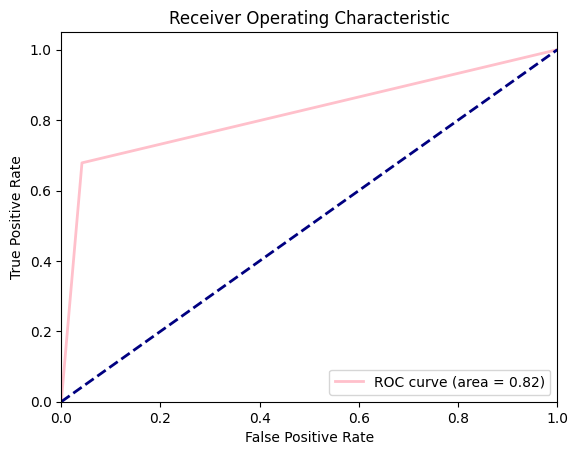

In [44]:

# Espacio de búsqueda de parámetros
param_grid = {
    'n_estimators': sp_randint(10, 200),
    'max_features': sp_randint(1, X.shape[1])
}

# Dividir los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=79, stratify=Y)


# Validación cruzada (3-fold)
inner = KFold(n_splits=3, shuffle=True, random_state=79)

budget = 100
# Búsqueda de hiperparámetros utilizando RandomizedSearchCV
clf = RandomizedSearchCV(
    estimator=ExtraTreesClassifier(class_weight='balanced'),
    param_distributions=param_grid,
    scoring='balanced_accuracy',
    cv=inner,
    n_jobs=-1,
    verbose=1,
    n_iter=budget
)

# Entrenamiento del modelo
np.random.seed(79)
clf.fit(X=X_train, y=y_train)

# Evaluación del modelo (opcional)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Imprimir la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='pink', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


··························································································································································································································································································································
Este modelo tiene buen acuurracy de 0.88 sin embargo es peor en cuanto a diferenciación de clases que otros modelos con menor acurracy pero mejor curva ROC. Clasifica mejor las instancias positivas que las negativas, realiza muy pocos fallos en los falsos negativos y muchos en los falsos positivos.En la gráfica de la curva se puede ver como está MUY inclinado a los falsos positivos(hacia la izquierda), en comparación con los verdaderos positivos.
··························································································································································································································································································································

----------------------------------------------------------------------------------------------------------------
## CHAT GPT
----------------------------------------------------------------------------------------------------------------

Chat GPT lo hemos utilizado para extraer los datos de la tabla y calcular algunos gráficos. Sobretodo hemos utilizado los tutoriales aportados en drive y vistos en cada clase. Siguiendo cada tutorial, hemos encontrado algunos errores al aplicarlos en nuestra práctica y en algunos casos cuando no sabiamos detectar el error consultabamos ChatGpt para poder identificarlo con mayor facilidad. 